# ECE 351 - Lab #5
### Collin Heist
#### Step and Impulse Response of RLC Bandpass FIlter

## Introduction
The purpose of this lab is to use Laplace Transformations to find the response of an RLC bandpass filter (in the time domain) to an impulse and step response. We'll be plotting our hand-calculated impulse response of the circuit to the SciPy package's response with the `scipy.signal.step()` function, and they _should_ be identical. We'll also use the Final Value Theorem to visually understand how the circuit will behave as time goes on.

## Function Declarations & Setup

In [10]:
# Necessary Imports
import numpy as np
import matplotlib.pyplot as plt
import scipy
import warnings
warnings.filterwarnings("ignore")

# Color list for multiple lines on each subplot
colors = ["red", "blue", "green", "gray"]

# Generic Function to create a plot
def create_plot(x, y, xLabel=["X-Values"], yLabel=["Y-Values"],
                title=["Plot"], num_rows=1):
    plt.figure(figsize=(18, 14), dpi=300)
    for c, (x_vals, y_vals, x_labels, y_labels, titles) in enumerate(
        zip(x, y, xLabel, yLabel, title)):
        for c2, (y_v, t) in enumerate(zip(y_vals, titles)):
            plt.subplot(num_rows, 1, c + 1)
            # Add a plot to the subplot, use transparency so they can both be seen
            plt.plot(x_vals, y_v, label=t, color=colors[c2], alpha=0.70)
            plt.ylabel(y_labels)
            plt.xlabel(x_labels)
            plt.grid(True)
            plt.legend(loc='lower right')
    
    plt.show()

## Part 1

In [26]:
# Impulse Response from the Prelab
def impulse_response(x_vals):
    return ((10000*np.exp(-5000*x_vals)*np.cos(18584.1*x_vals)-
             2690.47*np.exp(-5000*x_vals)*np.sin(18584.1*x_vals))*u(x_vals))

# Tuple for the H(s) function, written in terms of coefficients
def transfer_s():
    return ([0, 10000, 0], [1, 10000, 3.7078*10**8])

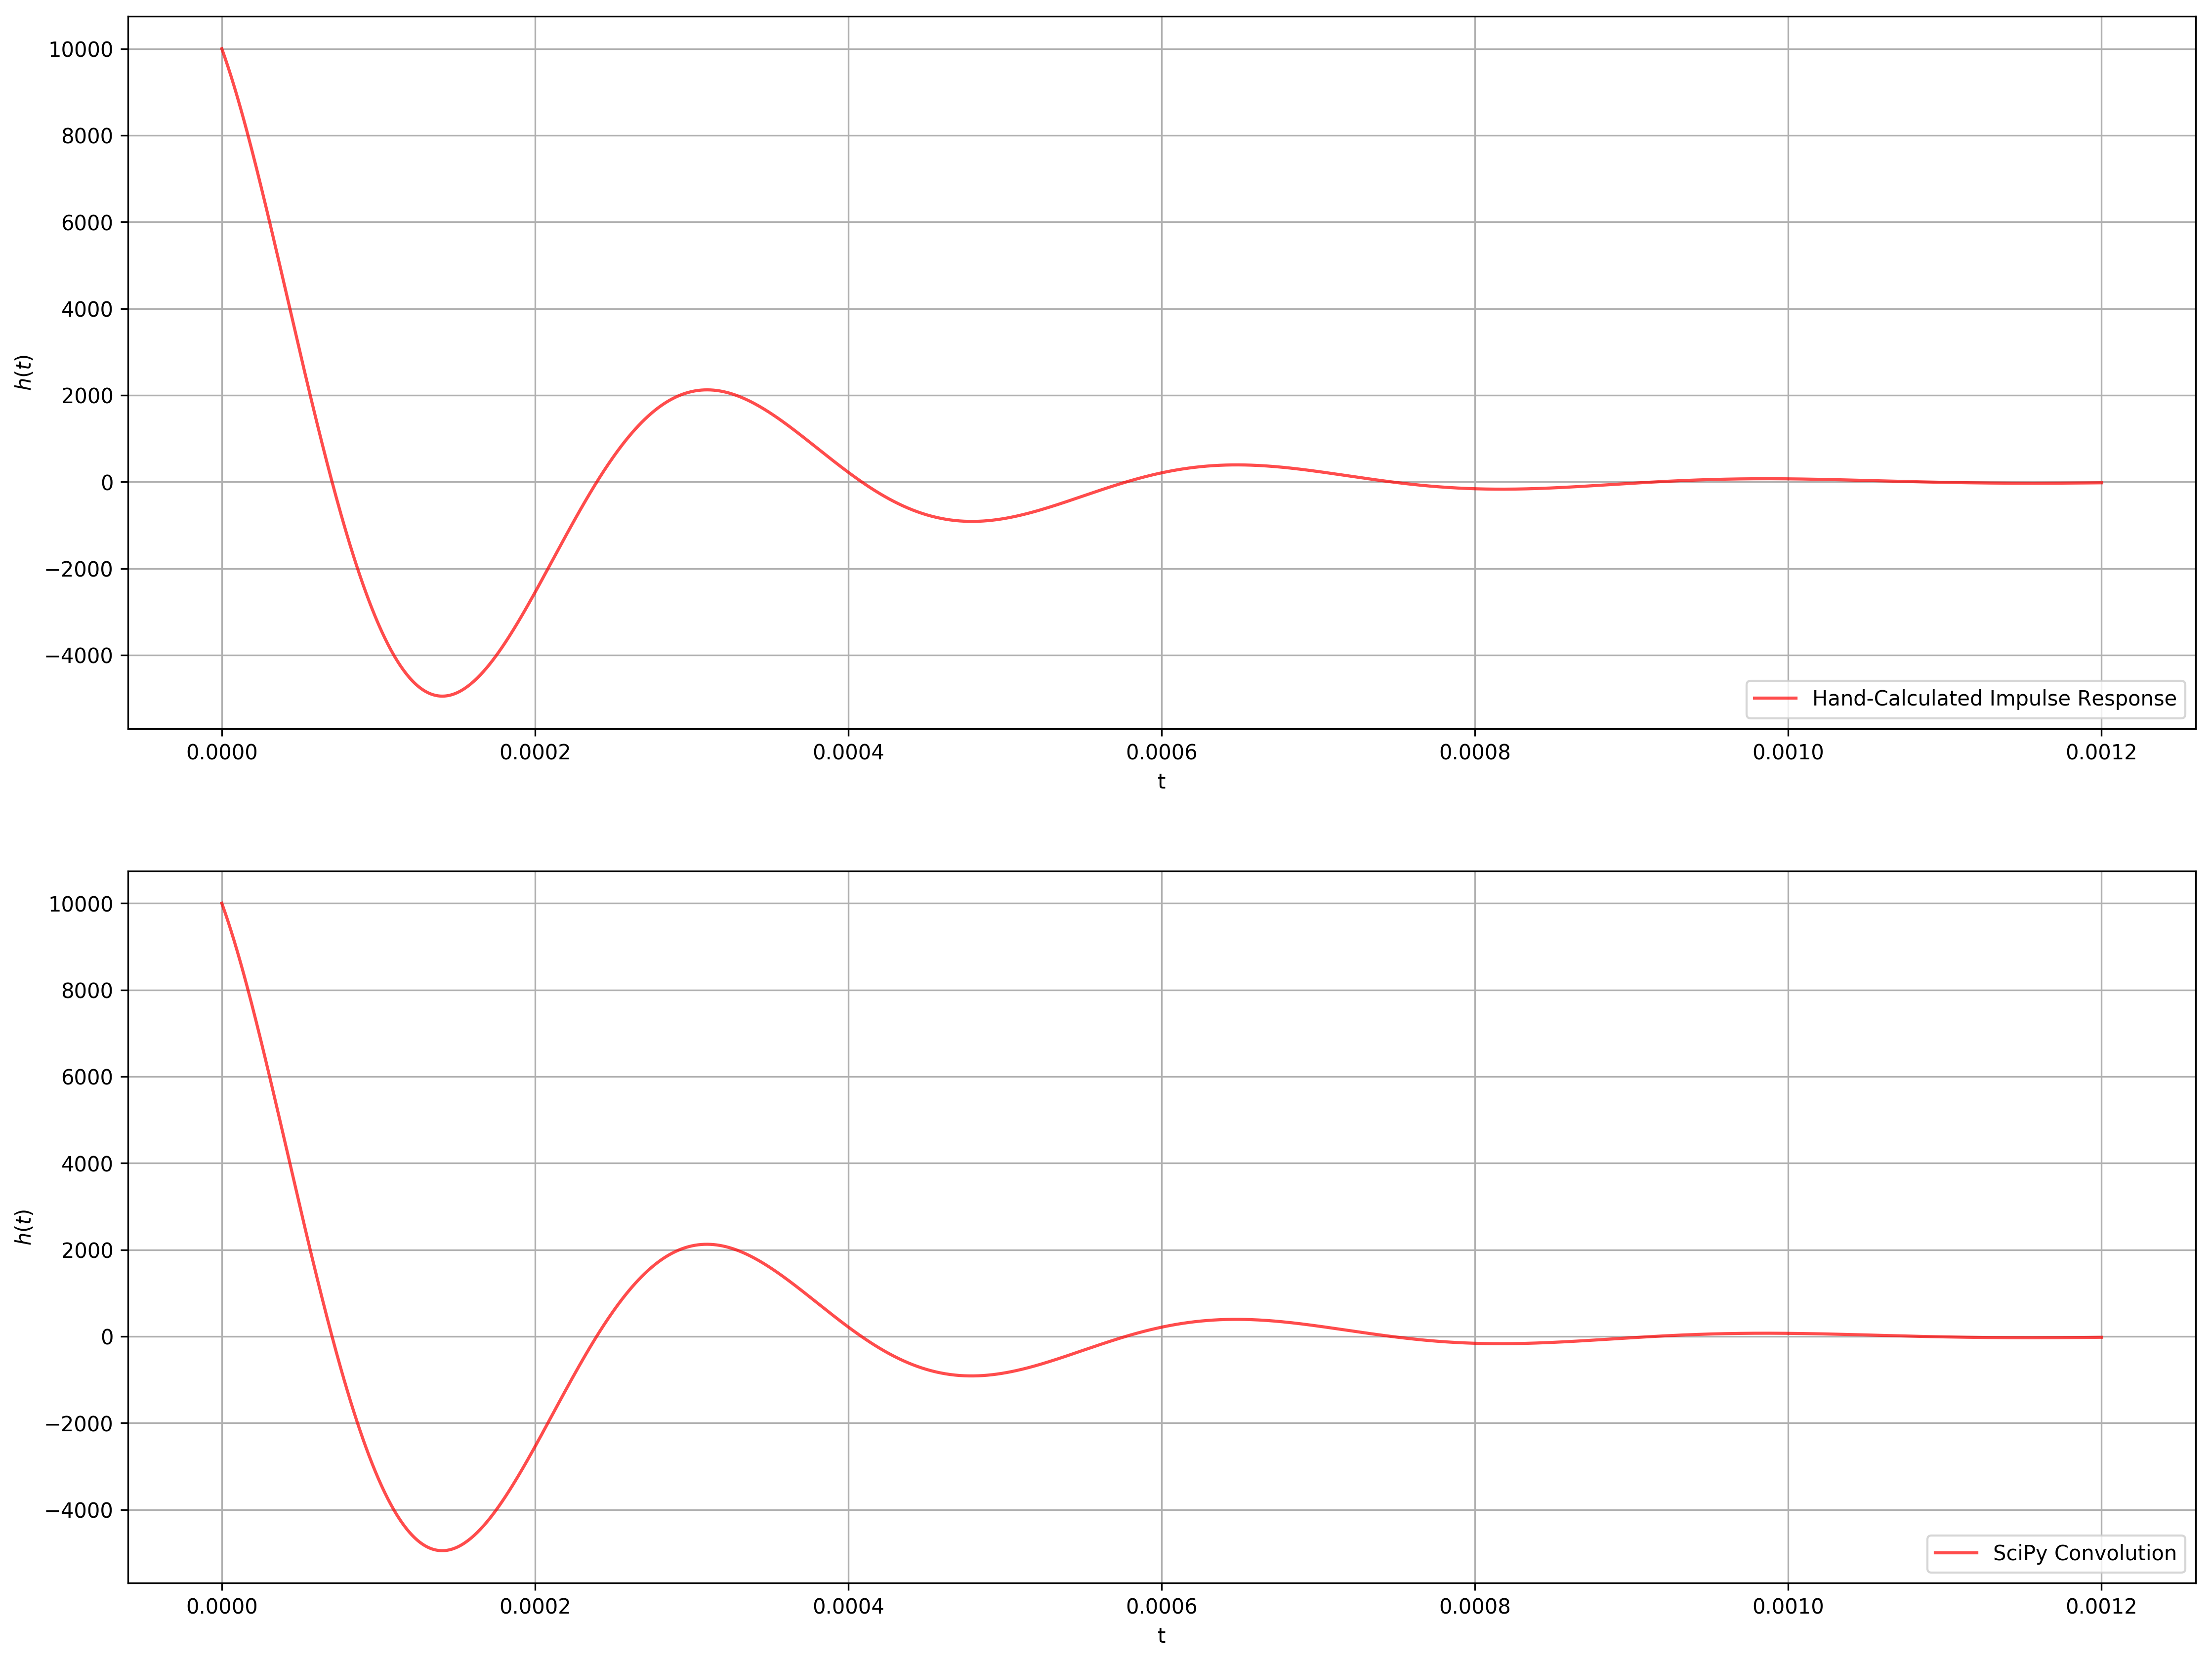

In [24]:
step_size = .000001
t = np.arange(0, 1.2e-3 + step_size, step_size)
impulse_t, impulse_y = scipy.signal.impulse(transfer_s(), T=t)
create_plot([t, impulse_t], [(impulse_response(t), ), (impulse_y, )],
            ["t", "t"], ["$h(t)$", "$h(t)$"],
            [("Hand-Calculated Impulse Response", ), ("SciPy Convolution", )], 2)

## Part 2

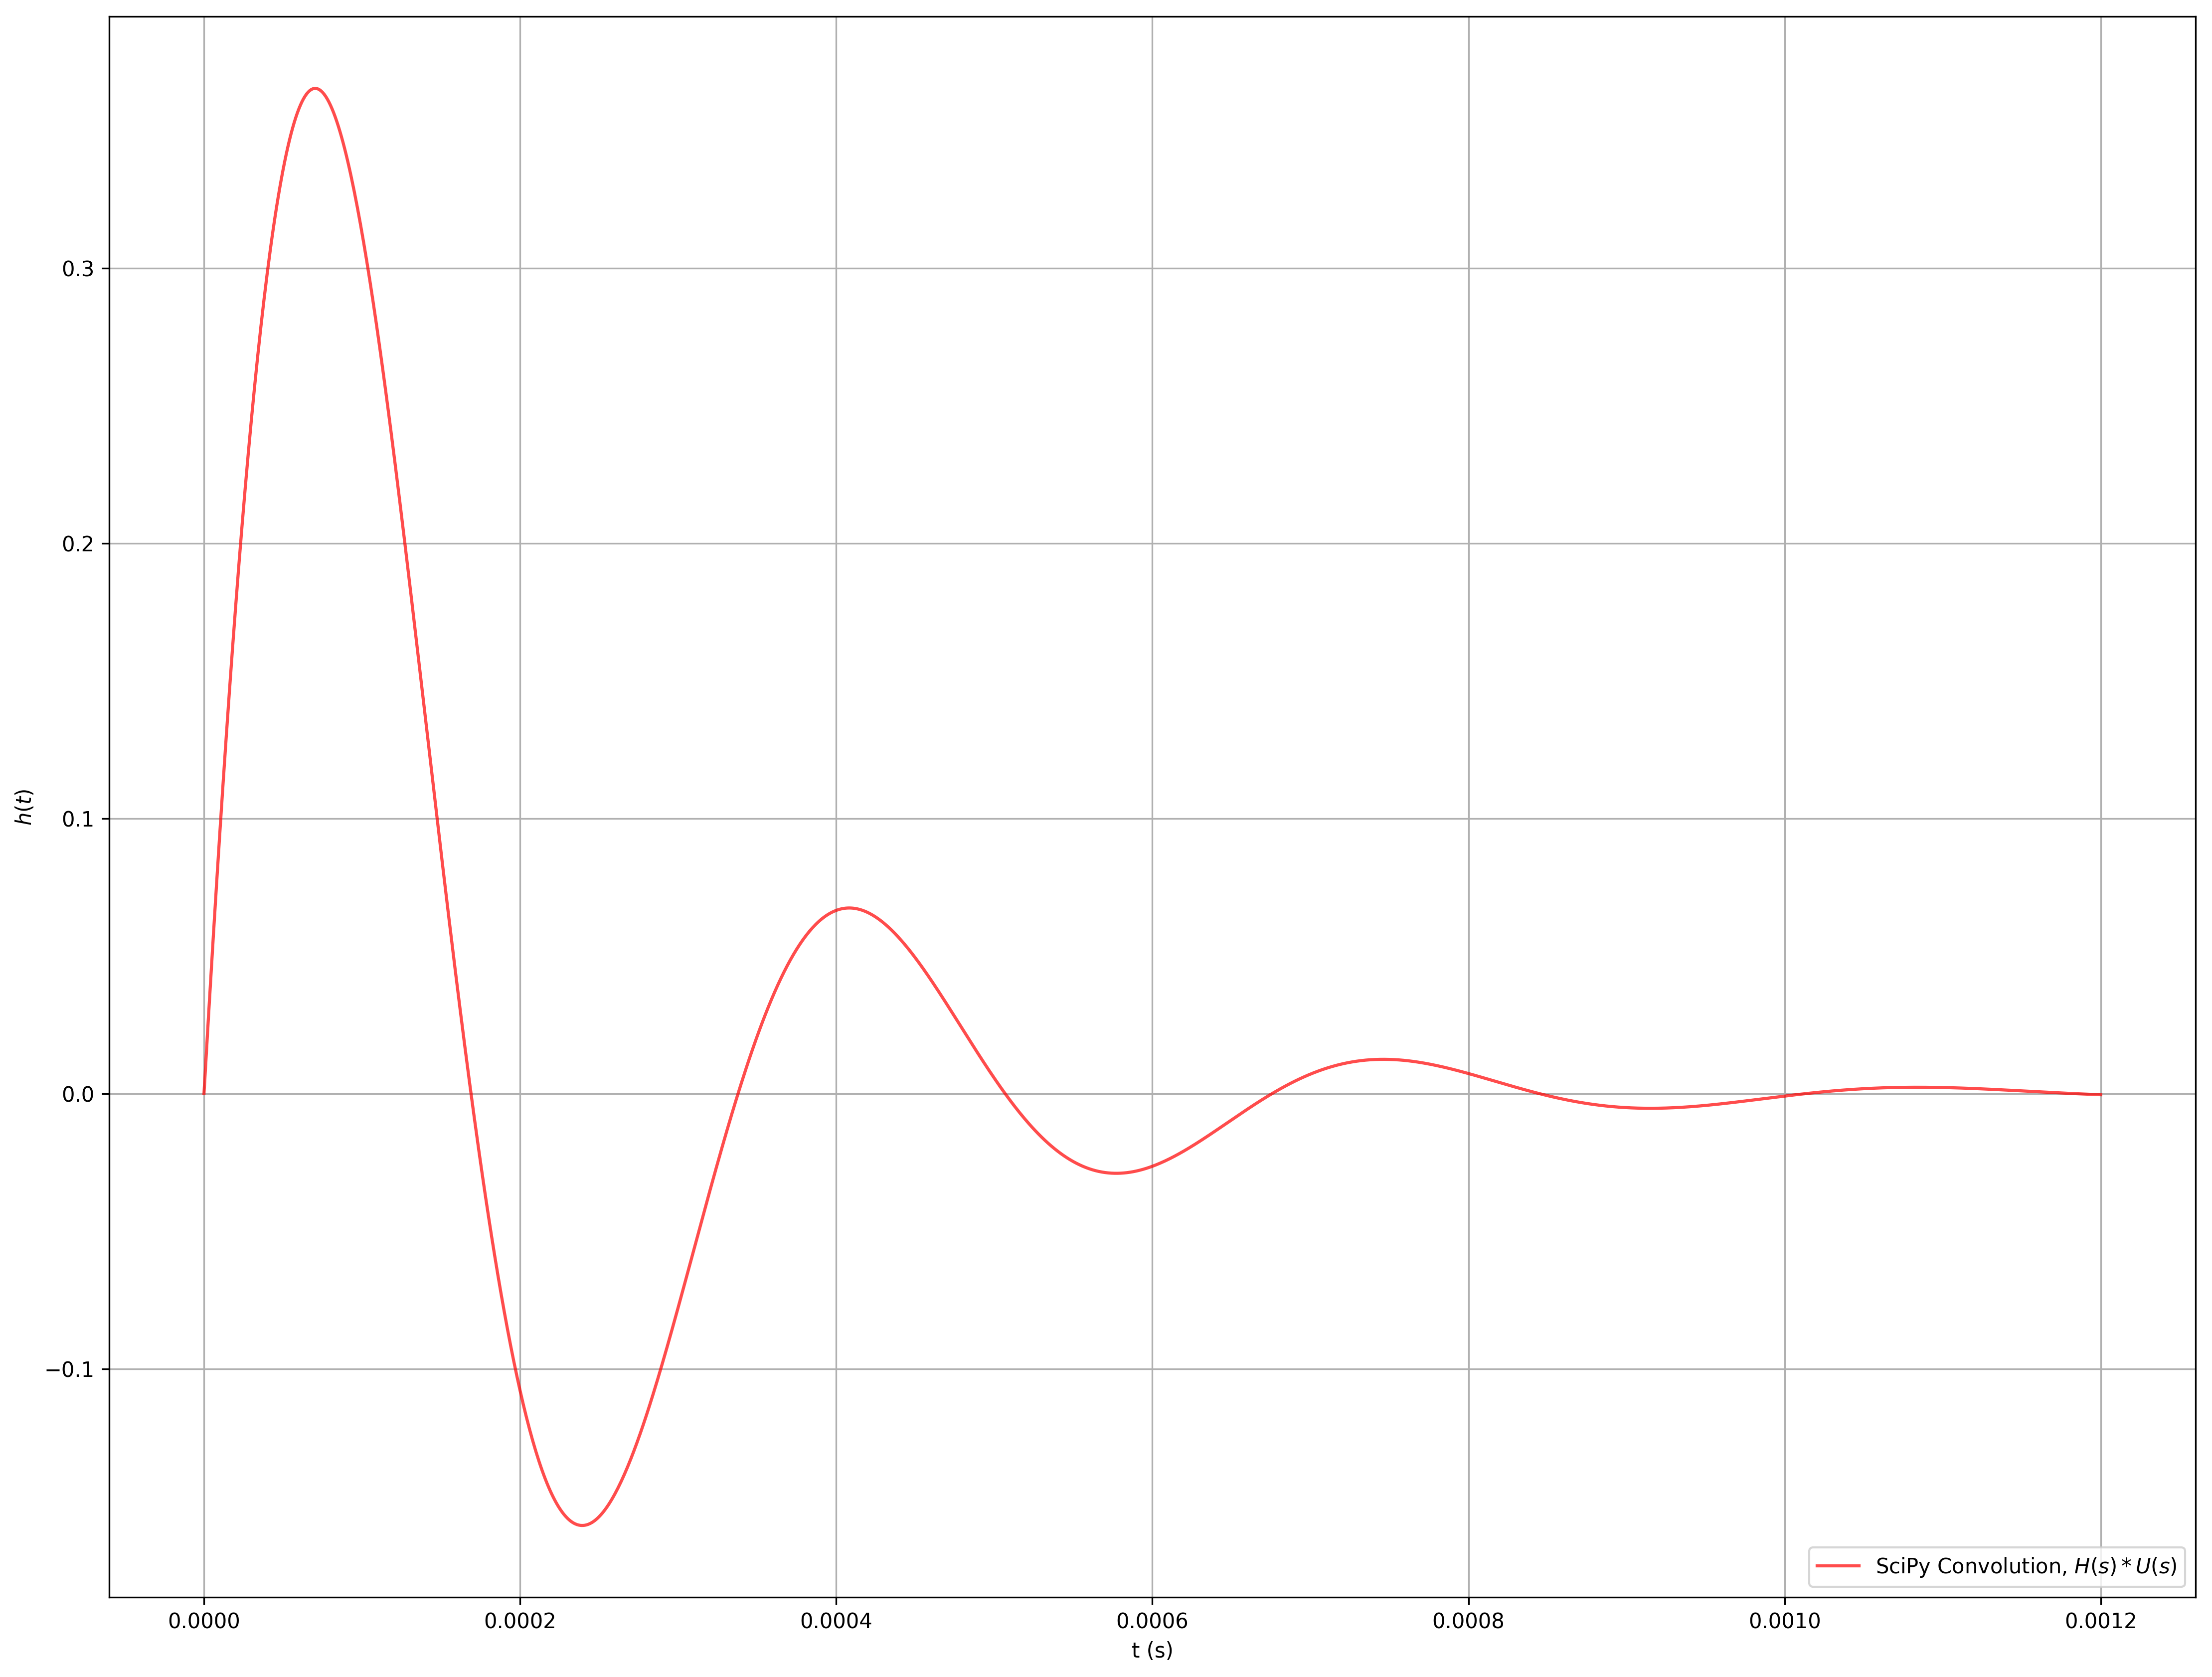

In [28]:
step_t, step_y = scipy.signal.step(transfer_s(t), T=t)
create_plot([step_t], [(step_y, )],
            ["t (s)"], ["$h(t)$"],
            [("SciPy Convolution, $H(s)*U(s)$", )], 1)

The Final Value Theorem is defined as:
$$\lim_{t \to \infty} f(t) = \lim_{s \to 0} s F(s)$$
In this situation, $F(s)$ is equal to $H(s)\cdot U(s)$:
$$H(s)=\frac{10,000s}{s^2+10,000s+3.7078\cdot 10^8}$$
$$Laplace(u(t)) = U(s) = \frac{1}{s}$$
***
$$\lim_{t \to \infty} f(t) = \lim_{s \to 0} s \cdot \frac{10,000s}{s^2+10,000s+3.7078\cdot 10^8} \frac{1}{s}$$
$$\lim_{t \to \infty} f(t) = \lim_{s \to 0} \frac{10,000s}{s^2+10,000s+3.7078\cdot 10^8}$$
$$\lim_{t \to \infty} f(t) = \frac{0}{0+0+3.7078\cdot 10^8}$$
$$\lim_{t \to \infty} f(t) = 0$$
Logically, this means that for an input function of $u(t)$, the end-result for this circuit is an output voltage of zero. In the time domain, this makes sense as the AC components only react to the initial step, not the DC component. In the laplace (s) domain, as the frequency goes to zero, meaning an entirely DC input, this also makes sense in that the output voltage is also zero.

## Questions
1. The results of the Final Value Theorem equaling zero implies that as the frequency of this system goes to zero, the output voltage should go to zero as well. This is because, for a completely DC input, the inductor acts as a short, resulting in all the voltage drop being across the resistor, and thus $V_{out}$ becoming zero. This also makes sense in the time domain to a step-function input. The circuit (specifically the LC component) resonate to the first step, but as time progresses (forever) the response to that first pulse becomes zero and all that remains is a DC input which shorts the inductor.
2. All of this lab's instructions were quite clear. The only confusion came from us not having actually _learned_ the Final Value Theorem yet, so I had to quickly learn it online.

## Conclusion
This lab showed just how much easier it is to perform convolution using laplace transformations. In particular, the use of laplace transformations allowed the RLC circuit analysis to be largely trivial. The SciPy package's impulse and step functions are quite interesting, as well. Logically, the results of the Final Value Theorem make a lot of sense, with a step-input resulting in an output voltage of zero.